## Data from EQ-evolution

In [57]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14
import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()



In [58]:
redshifts=[100, 90 , 50 , 20, 10, 0];
gev_pi = [];
gev_V_pi =[];
class_tk = [];
gev_m=[]
gev_phi=[]
for i in range(np.shape(redshifts)[0]):
    gev_pi.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_pi.dat"))
    gev_V_pi.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_V_pi.dat"))
    gev_m.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_delta.dat"))
    gev_phi.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_delta.dat"))

for i in range(np.shape(redshifts)[0]):
    class_tk.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_tk.dat"))
gev_bg= np.loadtxt("./../output/quintessence_background.dat")

bg= np.loadtxt("./../../EQ_hi_class/output/quin_background.dat")
Hconf_hiclass = interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])



# Power spectra

## Scalar field power spectrum

(1e-13, 6e-10)

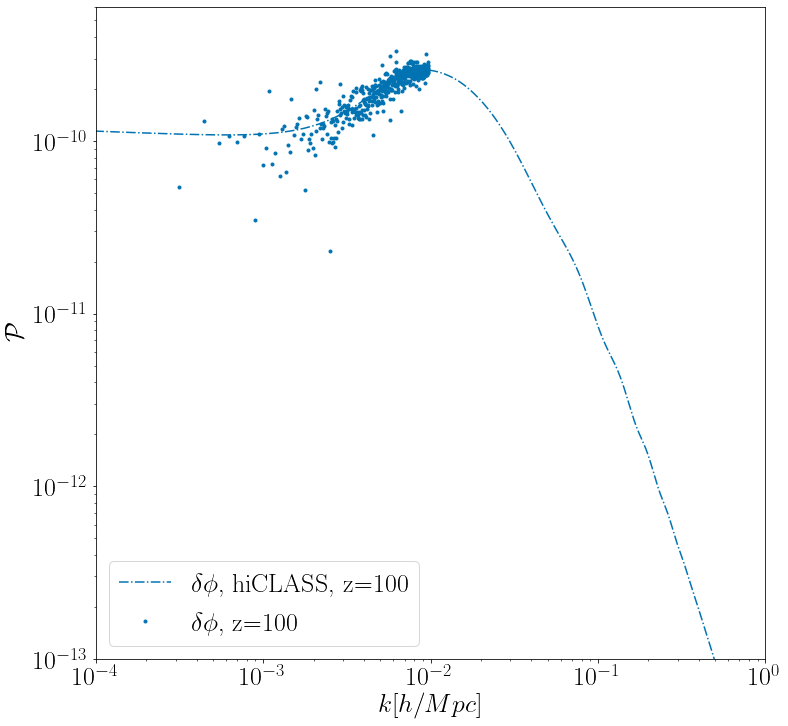

In [60]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

#########
## scalar_field
#########
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];
zini = 100.
aini = 1./(1+zini);
Normlization = As*(k_q/kp)**(ns-1.);
######

H0_hiclass = bg[-1:,3];
a_hiclass = 1./(1.+bg[:,0])

# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
scalar = interpolate.interp1d(bg[:,0],bg[:,29])
scalar_p = interpolate.interp1d(bg[:,0],bg[:,30])
scalar_pp = interpolate.interp1d(bg[:,0],bg[:,31])

#  bg[::num,30]/(bg[-1:,3])


###### hiclass results:
# redshifts = [100,50,20]
l=0
for i in range(0,1):
    alpha = (class_tk[i][:,11] + 6.0 *class_tk[i][:,13] )/(2.*k_q*k_q);
    Vx = class_tk[i][:,5]
    Vx = Vx +  alpha/h/h; # gauge transfomration to the Newtonian gauge #NOTE that v_x is in [1/Mpc]
    delta_phi = Vx * (1+redshifts[i]) * scalar_p(redshifts[i]);  #delta phi [hiclass] [1] = phi'[hiclass][1/T]/a * V_X (hiclass)[T]
    #delta phi [gev] [1] = phi'[gev][1/T]/a * V_X (gev)[T] ## V_X(gev)[T] = V_X[hiclass][T] * H_0 [hiclass]/H0[gev]
    
#   delta_phi = Vx * (1+redshifts[i]) * scalar_p(redshifts[i])/ Hconf_hiclass(0);  #
    plt.plot(class_tk[i][:,0], (delta_phi)**2* Normlization,"-.", color = Colors[l] , label = "$\delta \phi$, hiCLASS, z="+str(redshifts[i]))

    plt.plot(gev_V_pi[i][:,0],gev_pi[i][:,1],".", color = Colors[l] , label = "$\delta \phi$, z="+str(redshifts[i]))
    l=l+1
plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-13,6.e-10)


## phi' power

(1e-14, 1e-08)

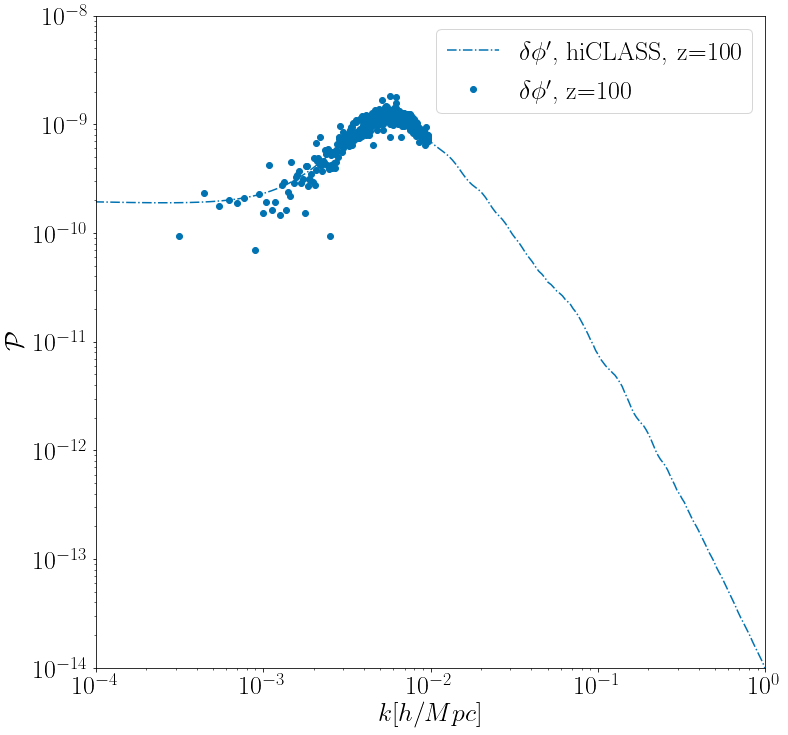

In [62]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];


Normlization = As*(k_q/kp)**(ns-1.);

H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
scalar = interpolate.interp1d(bg[:,0],bg[:,29])
scalar_p = interpolate.interp1d(bg[:,0],bg[:,30])
scalar_pp = interpolate.interp1d(bg[:,0],bg[:,31])
a_hiclass = 1./(1.+bg[:,0])

#####################
## scalar_field_prime
#####################


plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))

###### hiclass results:
# redshifts = [100,50,20]
l=0
for i in range(0,1):
    alpha = (class_tk[i][:,11] + 6.0 *class_tk[i][:,13] )/(2.*k_q*h*k_q*h);
    Vx = class_tk[i][:,5]
    Vx = Vx + alpha; # gauge transfomration to the Newtonian gauge
    delta_phi = Vx * (1+redshifts[i]) * scalar_p(redshifts[i]);
    z = redshifts[i];
    alpha_prime = (class_tk[0][:,9] + class_tk[0][:,8] -  class_tk[0][:,12]);
    Vx_prime = class_tk[0][:,6] + alpha_prime; # gauge transfomration
    delta_phi_prime = scalar_p(z)*(1+z) * Vx_prime +  delta_phi *  (scalar_pp(z)/scalar_p(z) -Hconf_hiclass(z)) #* scalar_p(z)*(1+z)# +  delta_phi * (scalar_pp(z)/ scalar_p(z) - Hconf_hiclass(z) ) #+ Vx * (- Hconf_hiclass(z) * scalar_p(z) + scalar_pp(z)))/aini;
    # delta phi'[gev] [1/T] = phi'[gev][1/T]/a * V_X'[1] + delta phi_gev[1] * (phi''[gev][1/T^2]/phi'[gev][1/T] - H_gev[1/T])
    # deltaphi'(output) = delta phi'[gev] [1/T] /H0(gev)
    delta_phi_prime = delta_phi_prime/Hconf_hiclass(0);

    plt.plot(class_tk[0][:,0], (delta_phi_prime)**2* Normlization,"-.", color = Colors[l] , label = "$\delta\phi'$, hiCLASS, z="+str(z))
    plt.plot(gev_V_pi[0][:,0], gev_V_pi[0][:,1],"o",color = Colors[l],label = r"$\delta\phi'$, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-14,1.e-8)


# Matter power spectrum, gauge transformation

In [63]:
tk_new = (np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(2+1)+"_tk.dat"));
tk_sync = (np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(2+1)+"_tk.dat"));


(1e-13, 1.0)

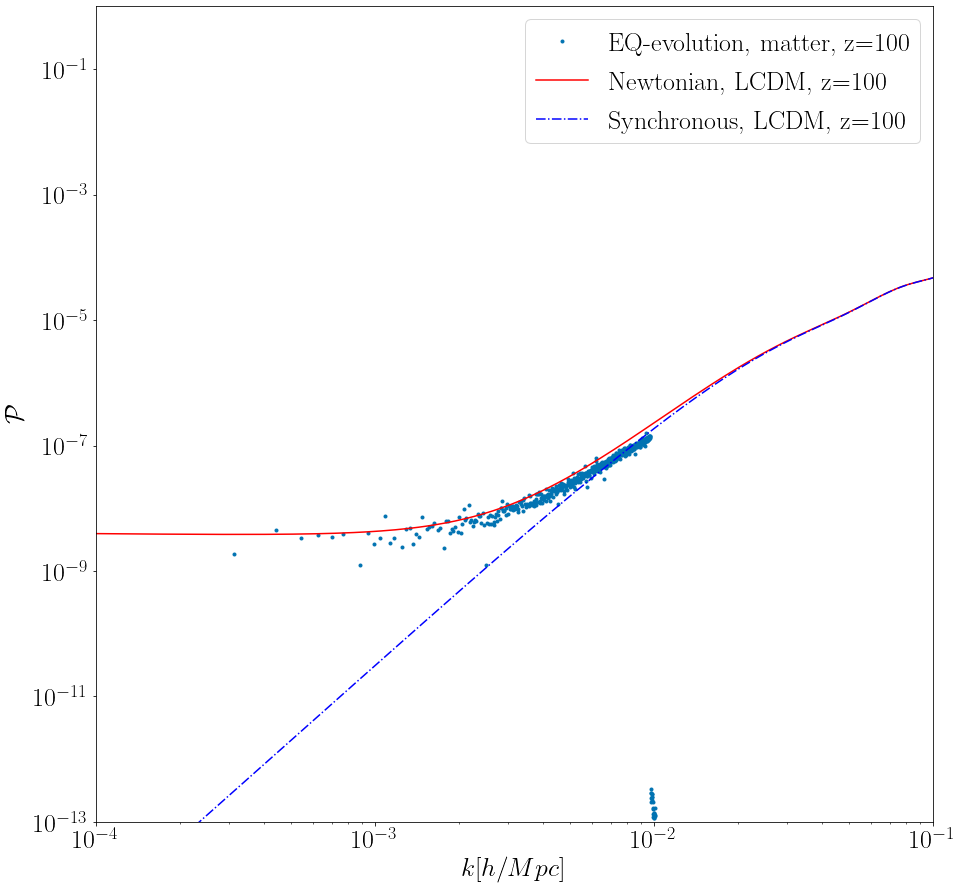

In [65]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];

rho_fld = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_rad = interpolate.interp1d(bg[:,0] ,bg[:,14])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,16])
w_fld = interpolate.interp1d(bg[:,0] ,bg[:,13])

Normlization = As*(k_q/kp)**(ns-1.);

H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

Pk_newt_hiclass=[]
for i in range(np.shape(redshifts)[0]):
    Pk_newt_hiclass.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat"));

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

###### hiclass results:
l=0
for i in range(0,1):
    alpha = (class_tk[i][:,11] + 6.0 *class_tk[i][:,13] )/(2.*k_q*k_q);
#     d_b
    z=redshifts[i]
    
    k= class_tk[i][:,0]
    h_prime=class_tk[i][:,10]
    eta_prime = class_tk[i][:,12]
    psi = class_tk[i][:,8]
    phi = class_tk[i][:,7]
    eta = class_tk[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    #####


    d_b = class_tk[i][:,2]
    d_cdm = class_tk[i][:,3]
    d_tot = (d_b * rho_b(z) + d_cdm * rho_cdm(z))/(rho_b(z)+rho_cdm(z))
    z= redshifts[i];
    
#     d_tot = d_tot - alpha * 3. * Hconf_hiclass(z)
#     plt.plot(class_tk[0][:,0], (d_tot )**2* Normlization,"-*", color = Colors[l] , label = r"$\delta_{tot}$, hiCLASS transfer gauge transformed, z="+str(z))

    k_h = Pk_newt_hiclass[i][:,0];
    plt.plot(gev_m[i][:,0], (gev_m[i][:,1]),".", color = Colors[l] , label = "EQ-evolution, matter, z="+str(z))
#     plt.plot(Pk_newt_hiclass[i][:,0], Pk_newt_hiclass[i][:,1] *k_h**3/(2.*np.pi**2) ,"-.",color = Colors[l],label = r"hiclass, power, z="+str(z))
    l=l+1
    
k_q = tk_new[:,0];
Normlization = As*(k_q/kp)**(ns-1.);
plt.plot(tk_new[:,0], (tk_new[:,6])**2* Normlization,"-", color = "red" , label = r"Newtonian, LCDM, z="+str(100))

k_q = tk_sync[:,0];

plt.plot(tk_sync[:,0], (tk_sync[:,6])**2* Normlization,"-.", color = "blue" , label = r"Synchronous, LCDM, z="+str(100))

plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e-1)
plt.ylim(1.e-13,1.e0)


(0.0001, 1.0)

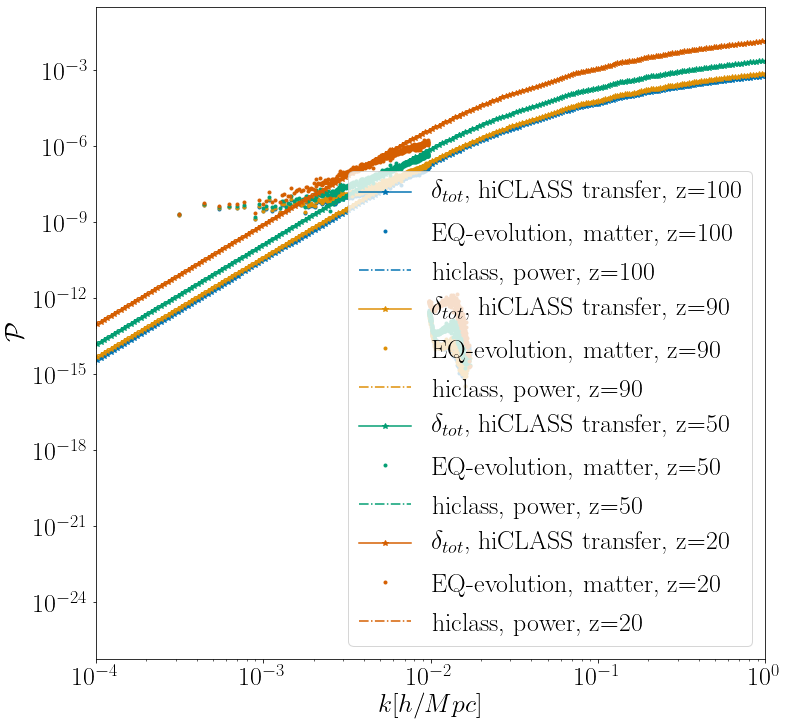

In [67]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];


Normlization = As*(k_q/kp)**(ns-1.);

H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

Pk_newt_hiclass=[]
for i in range(np.shape(redshifts)[0]):
    Pk_newt_hiclass.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat"));

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))

###### hiclass results:
l=0
for i in range(0,4):
    alpha = (class_tk[i][:,11] + 6.0 *class_tk[i][:,13] )/(2.*k_q*k_q);
#     d_b
    z=redshifts[i]
    
    k= class_tk[i][:,0]
    h_prime=class_tk[i][:,10]
    eta_prime = class_tk[i][:,12]
    psi = class_tk[i][:,8]
    phi = class_tk[i][:,7]
    eta = class_tk[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;

    
    plt.plot(class_tk[0][:,0], (phi)**2* Normlization,"-*", color = Colors[l] , label = r"$\delta_{tot}$, hiCLASS transfer, z="+str(z))

    k_h = Pk_newt_hiclass[i][:,0];
    plt.plot(gev_m[i][:,0], (gev_m[i][:,1]),".", color = Colors[l] , label = "EQ-evolution, matter, z="+str(z))
    plt.plot(Pk_newt_hiclass[i][:,0], Pk_newt_hiclass[i][:,1] *k_h**3/(2.*np.pi**2) ,"-.",color = Colors[l],label = r"hiclass, power, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
# plt.ylim(1.e-14,1.e-8)


# Potential power spectrum

In [134]:
gev_ref = np.loadtxt("/Users/farbod/Packages/gevolution-1.1/output/lcdm_pk000_phi.dat")

gev_phi=[]
i=0
gev_phi.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_delta.dat"))

(1e-14, 0.01)

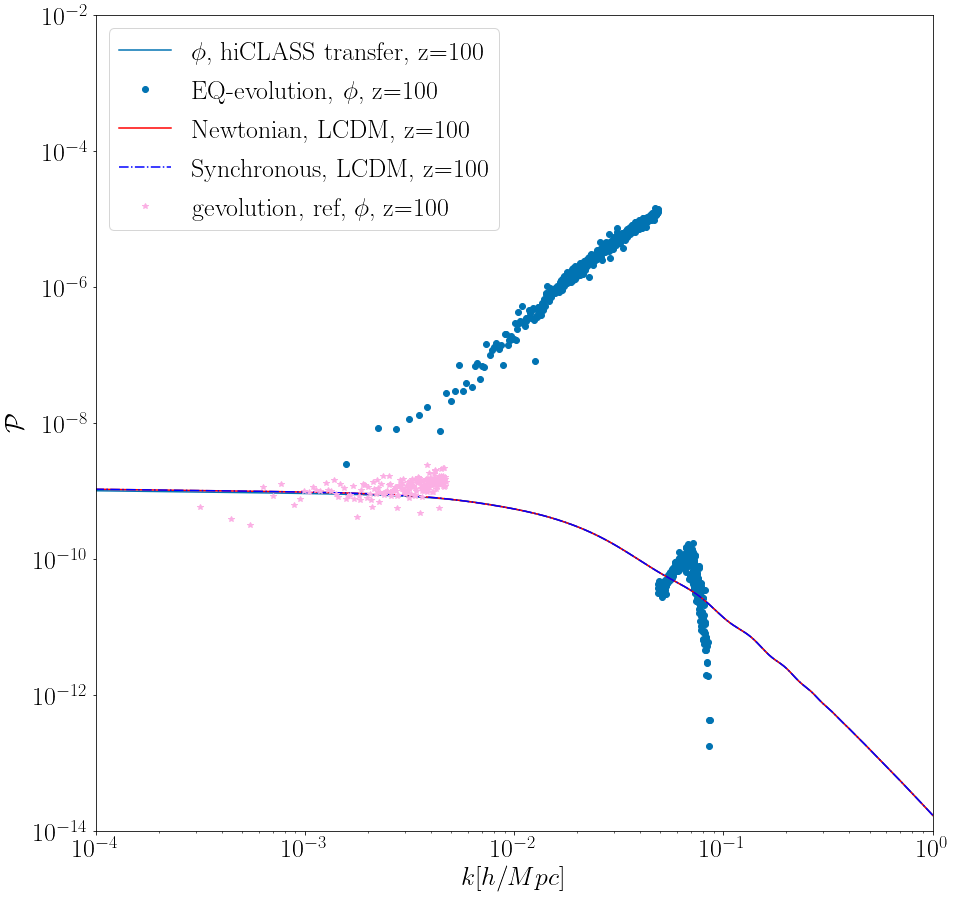

In [136]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];
Normlization = As*(k_q/kp)**(ns-1.);



H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

Pk_newt_hiclass=[]
for i in range(np.shape(redshifts)[0]):
    Pk_newt_hiclass.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat"));

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

###### hiclass results:
l=0
for i in range(1):
    i=0
    alpha = (class_tk[i][:,11] + 6.0 *class_tk[i][:,13] )/(2.*k_q*k_q);
#     d_b
    z=redshifts[i]
    
    k= class_tk[i][:,0]
    h_prime=class_tk[i][:,10]
    eta_prime = class_tk[i][:,12]
    psi = class_tk[i][:,9]
    phi = class_tk[i][:,8]
    eta = class_tk[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;

    
    plt.plot(class_tk[0][:,0], (psi)**2* Normlization,"-", color = Colors[l] , label = r"$\phi$, hiCLASS transfer, z="+str(z))

    k_h = Pk_newt_hiclass[i][:,0];
    plt.plot(gev_phi[i][:,0], (gev_phi[i][:,1]),"o", color = Colors[l] , label = r"EQ-evolution, $\phi$, z="+str(z))
    l=l+1
    
k_q = tk_new[:,0];
Normlization = As*(k_q/kp)**(ns-1.);
plt.plot(tk_new[:,0], (tk_new[:,7])**2* Normlization,"-", color = "red" , label = r"Newtonian, LCDM, z="+str(100))

k_q = tk_sync[:,0];

plt.plot(tk_sync[:,0], (tk_sync[:,7])**2* Normlization,"-.", color = "blue" , label = r"Synchronous, LCDM, z="+str(100))


plt.plot(gev_ref[:,0], (gev_ref[:,1]),"*", color = Colors[l+5] , label = r"gevolution, ref, $\phi$, z="+str(100))

plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-14,1.e-2)


# Testing the values of the columns

## Background values:

In [17]:
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_ur = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,14])
rho_smg = interpolate.interp1d(bg[:,0] ,bg[:,19])
p_smg = interpolate.interp1d(bg[:,0] ,bg[:,20])

z=100

Omega_smg=rho_smg(z)/rho_tot(z);
Omega_m = (rho_cdm(z)+rho_b(z))/rho_tot(z);
Omega_rad=(rho_ur(z) + rho_g(z))/rho_tot(z);
w_smg = p_smg(z)/rho_smg(z);

print("Omega_smg:", Omega_smg," Omega_m: ",Omega_m, "Omega_rad: ",Omega_rad, " w_smg: ",w_smg)

Omega_smg: 3.325946888184387e-05  Omega_m:  0.9711507188201423 Omega_rad:  0.02881602171116236  w_smg:  -0.7963640632835104


## transfer functions:

In [20]:
i=0
z= redshifts[i];
k= class_tk[i][:,0]
h_prime=class_tk[i][:,11]
eta_prime = class_tk[i][:,13]
psi = class_tk[i][:,9]
phi = class_tk[i][:,8]
eta = class_tk[i][:,12]
alpha = (h_prime + 6.*eta_prime)/(2.*k*h*k*h);
alpha_prime = psi + phi - eta;
#######
psi_int = interpolate.interp1d(k ,psi)
phi_int = interpolate.interp1d(k , phi)
eta_int = interpolate.interp1d(k , eta)
alpha_int = interpolate.interp1d(k , alpha)
alpha_prime_int = interpolate.interp1d(k , alpha_prime)

delta_b = interpolate.interp1d(k , class_tk[i][:,2]) 
delta_cdm = interpolate.interp1d(k , class_tk[i][:,3]) 
delta_g = interpolate.interp1d(k , class_tk[i][:,1]) 
delta_v_x = interpolate.interp1d(k , class_tk[i][:,5]) 
delta_v_x_prime = interpolate.interp1d(k , class_tk[i][:,6]) 
delta_tot = interpolate.interp1d(k , class_tk[i][:,7]) 
t_b = interpolate.interp1d(k , class_tk[i][:,17]) 
t_tot = interpolate.interp1d(k , class_tk[i][:,19]) 
w=-.9
matter = ((rho_b(z)+rho_cdm(z))*(1+w *0))/rho_tot(z)
rad = ((rho_ur(z)+rho_g(z))*(1+1/3.))/rho_tot(z)
# fld = (rho_fld(z)*(1+w_fld(z)))/rho_tot(z)
### Check if the values make sense:

k_p=0.102345;
print("z: ",z, "delta_tot: ",delta_tot(k_p), "t_tot: ", t_tot(k_p), "k: ",k_p," alpha:",alpha_int(k_p)
      , " alpha_prime: ",alpha_prime_int(k_p),"delta_tot_g: "
      , delta_tot(k_p)-alpha_int(k_p) * 3. * (matter + rad  ) * Hconf_hiclass(z), "t_tot_g: ", t_tot(k_p) + alpha_int(k_p) *k_p*k_p*h*h)

print("z: ",z, "delta_b: ",delta_b(k_p), "t_b: ", t_b(k_p), "k: ",k_p," alpha:",alpha_int(k_p)
      , " alpha_prime: ",alpha_prime_int(k_p),"delta_tot_g: "
      , delta_b(k_p)-alpha_int(k_p) * 3. * (1.) * Hconf_hiclass(z), "t_b_g: ", t_b(k_p) + alpha_int(k_p) *k_p*k_p*h*h)



print("z: ",z, "v_x: ",delta_v_x(k_p), "v_x_prime: ", delta_v_x_prime(k_p), "k: ",k_p," alpha:",alpha_int(k_p)
      , " alpha_prime: ",alpha_prime_int(k_p),"v_x_g: "
      , delta_v_x(k_p)-alpha_int(k_p) * 3. * (1.) * Hconf_hiclass(z), "v_x_prime_g: ", delta_v_x_prime(k_p) + alpha_prime_int(k_p))



z:  100 delta_tot:  -148.93441091879507 t_tot:  -0.009191315077799704 k:  0.102345  alpha: 40.76315684328044  alpha_prime:  0.024718984435629827 delta_tot_g:  -149.09289869179273 t_tot_g:  0.1856714786350482
z:  100 delta_b:  -103.0815910596838 t_b:  -0.011947900270092685 k:  0.102345  alpha: 40.76315684328044  alpha_prime:  0.024718984435629827 delta_tot_g:  -103.23857615858304 t_b_g:  0.18291489344275524
z:  100 v_x:  50.50202106314484 v_x_prime:  0.03123081033390956 k:  0.102345  alpha: 40.76315684328044  alpha_prime:  0.024718984435629827 v_x_g:  50.3450359642456 v_x_prime_g:  0.05594979476953939


# Gauge transformation study

## CLASS k-essence Newtonian vs Synchronous

In [116]:
# redshifts = [1000, 500,100,50,10,3,1,0];
# pk_new=[];
# pk_sync=[];
# tk_new=[];
# tk_sync=[];

# for i in range(np.shape(redshifts)[0]):
#     pk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_pk.dat"));
#     pk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_pk.dat"))

#     tk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_tk.dat"));
#     tk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_tk.dat"));

# #     newt_tk = 

## Power spectrum

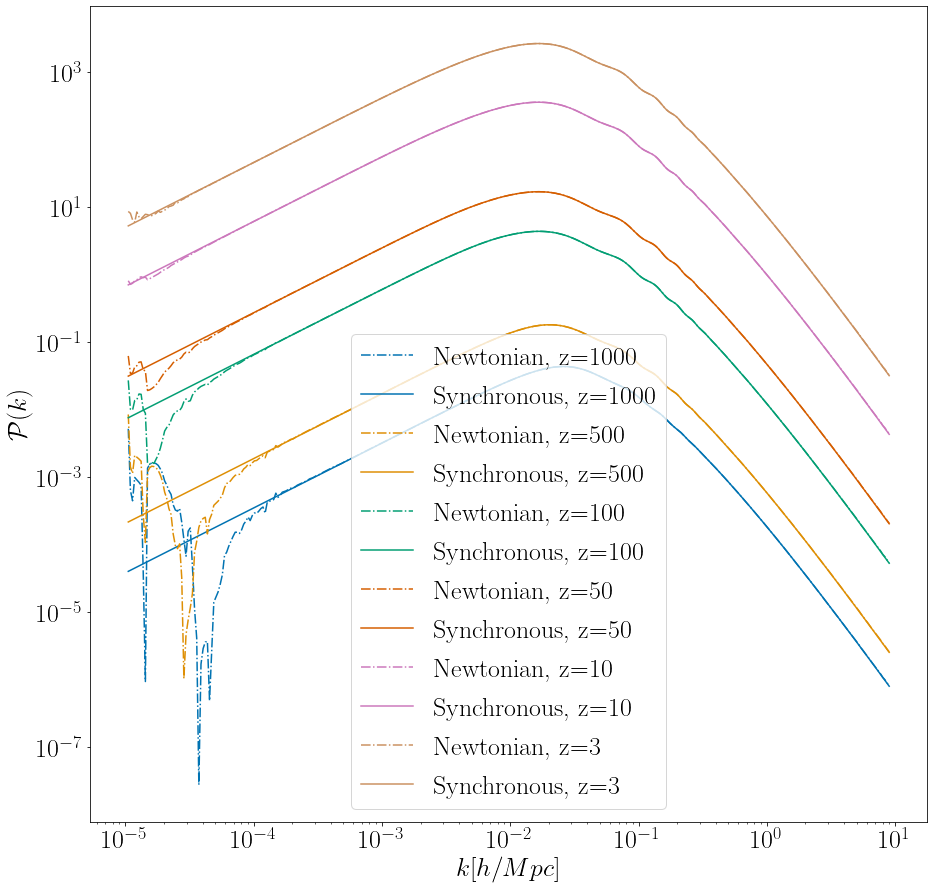

In [158]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,6):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;

    z= redshifts[i];
    plt.plot(pk_new[i][:,0], pk_new[i][:,1],"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(pk_sync[i][:,0], pk_sync[i][:,1],"-",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$\mathcal{P}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1.e-5,1.e0)
# plt.ylim(1.e-14,1.e-8)

## Transfer functions

### d_cdm

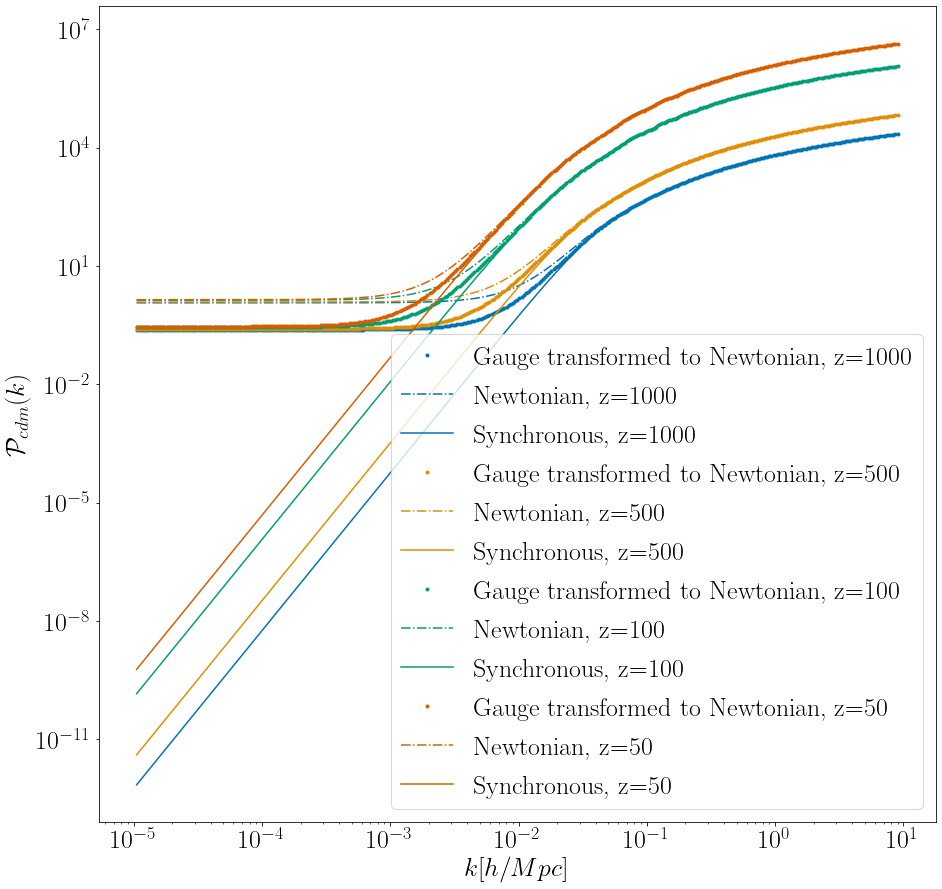

In [120]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )

# for i in range(0,4):
    
#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     z= redshifts[i];

#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,3]-alpha * 3. * Hconf_hiclass(z))**2,".",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][:,0], (tk_new[i][:,3])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,3])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{cdm}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-2)
# # plt.ylim(1e-2,10.0)

### d_b

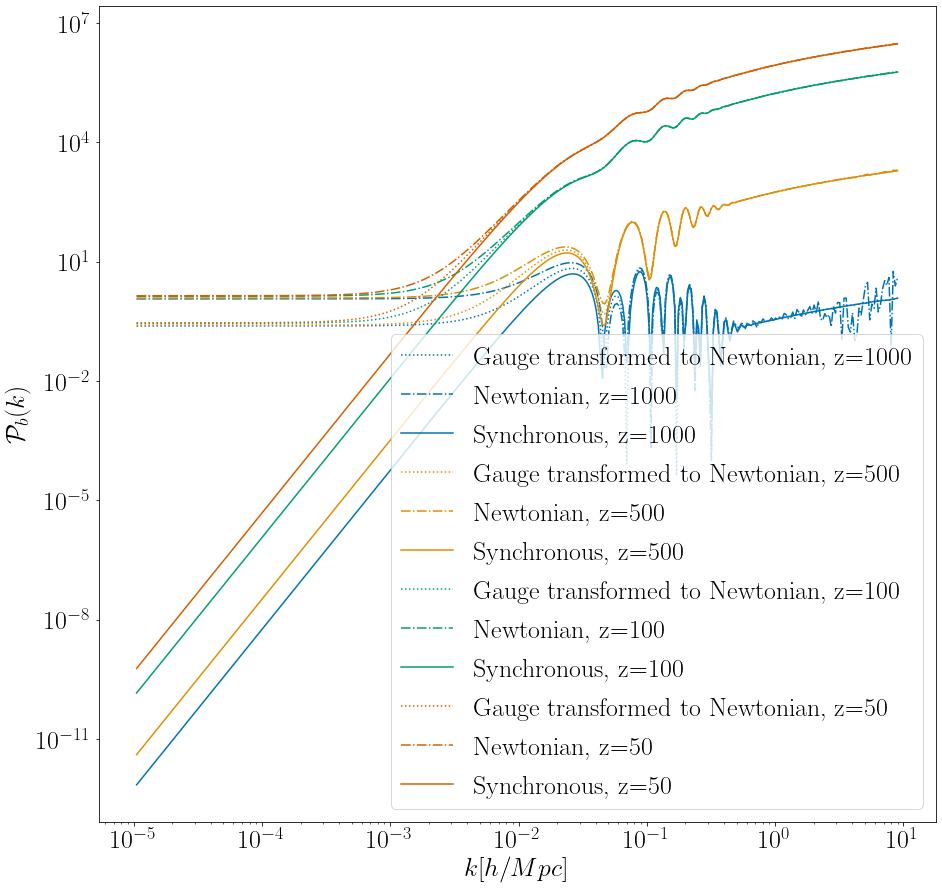

In [28]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,4):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,2]-alpha * 3. * Hconf_hiclass(z))**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,2])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,2])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{b}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-2)
# # plt.ylim(1.,10.0)

### d_g

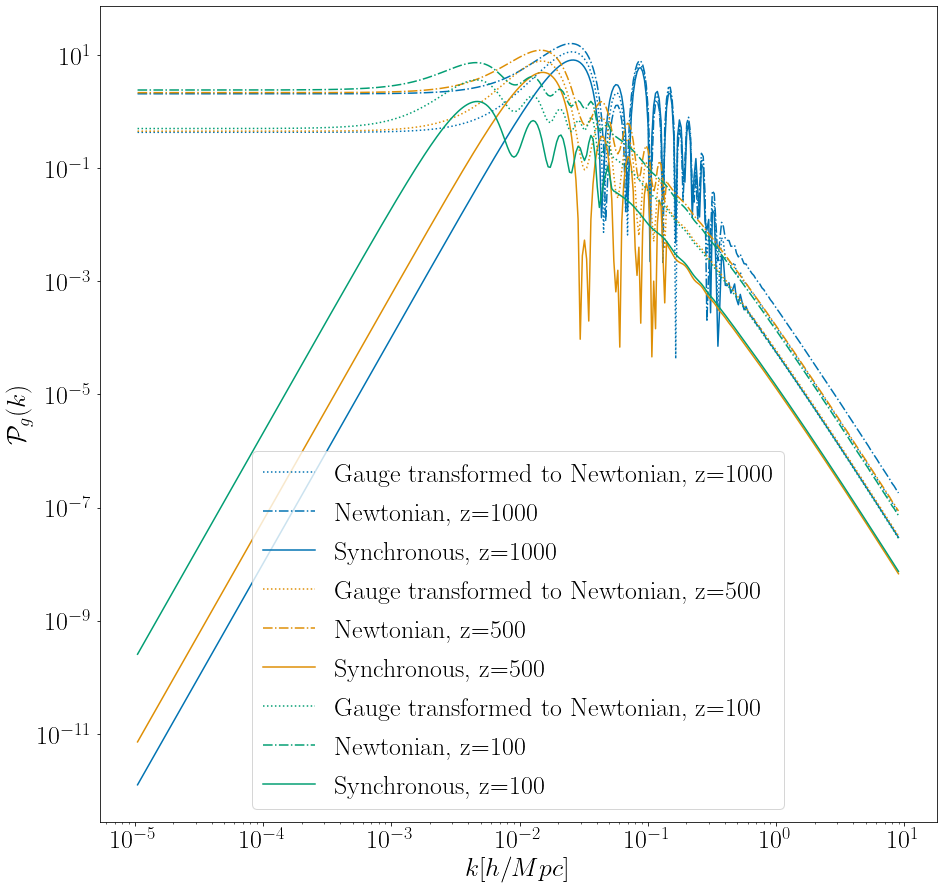

In [30]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,1]-alpha * 4. * Hconf_hiclass(z))**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,1])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,1])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{g}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-2)
# # plt.ylim(1.,10.0)

### d_fld

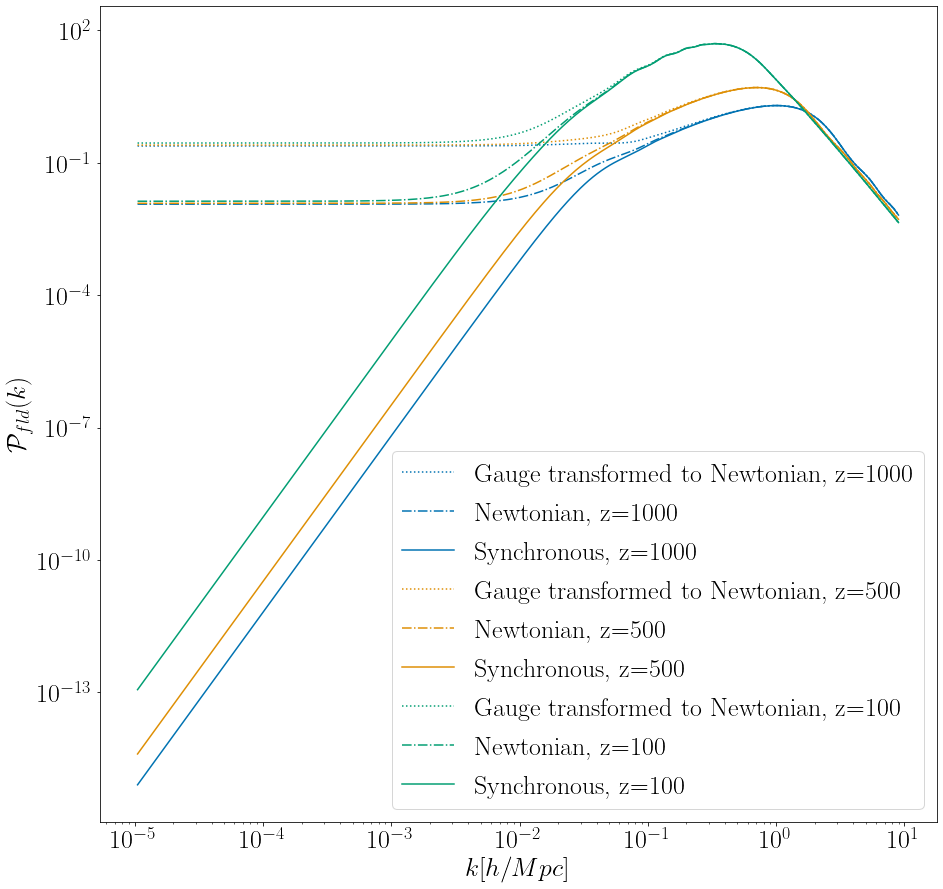

In [32]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,4]-alpha * 3. * Hconf_hiclass(z))**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,4])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,4])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{fld}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-3)
# # plt.ylim(1.e-2,3.e-2)

### t_cdm

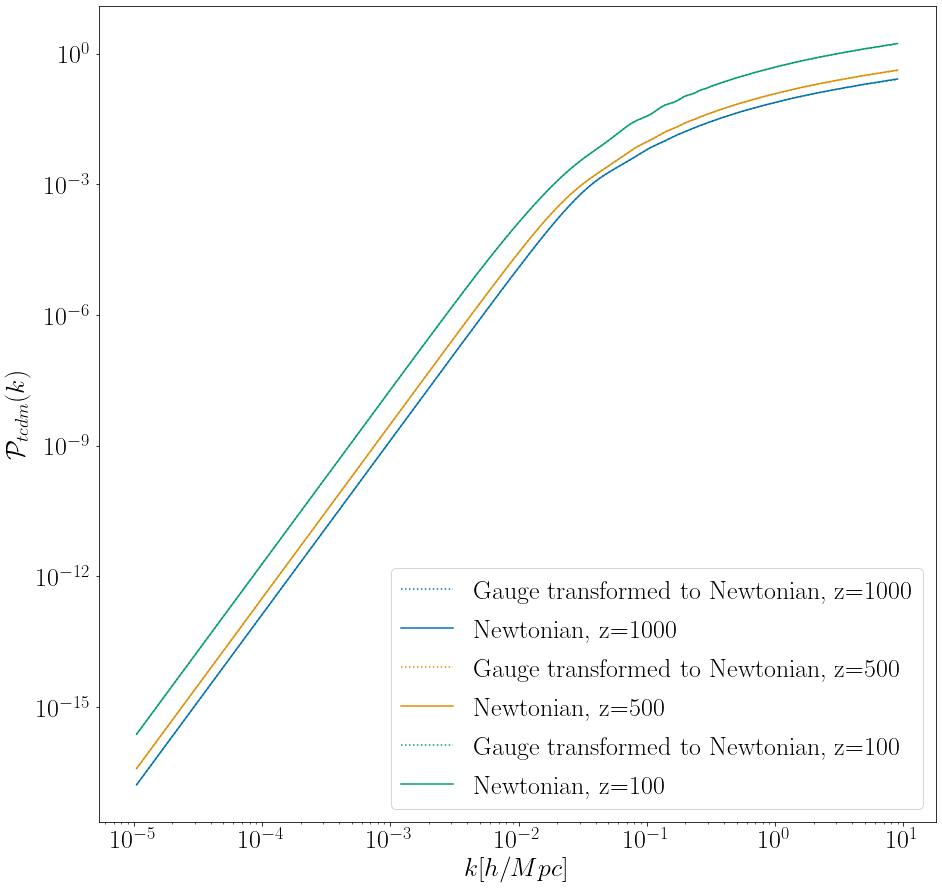

In [47]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (0-alpha*k*k)**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,14])**2,"-", color = Colors[l] , label = r"Newtonian, z="+str(z))
# #     plt.plot(tk_sync[i][:,0], (0)**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{tcdm}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-3)
# # plt.ylim(1.e-2,3.e-2)

### t_b

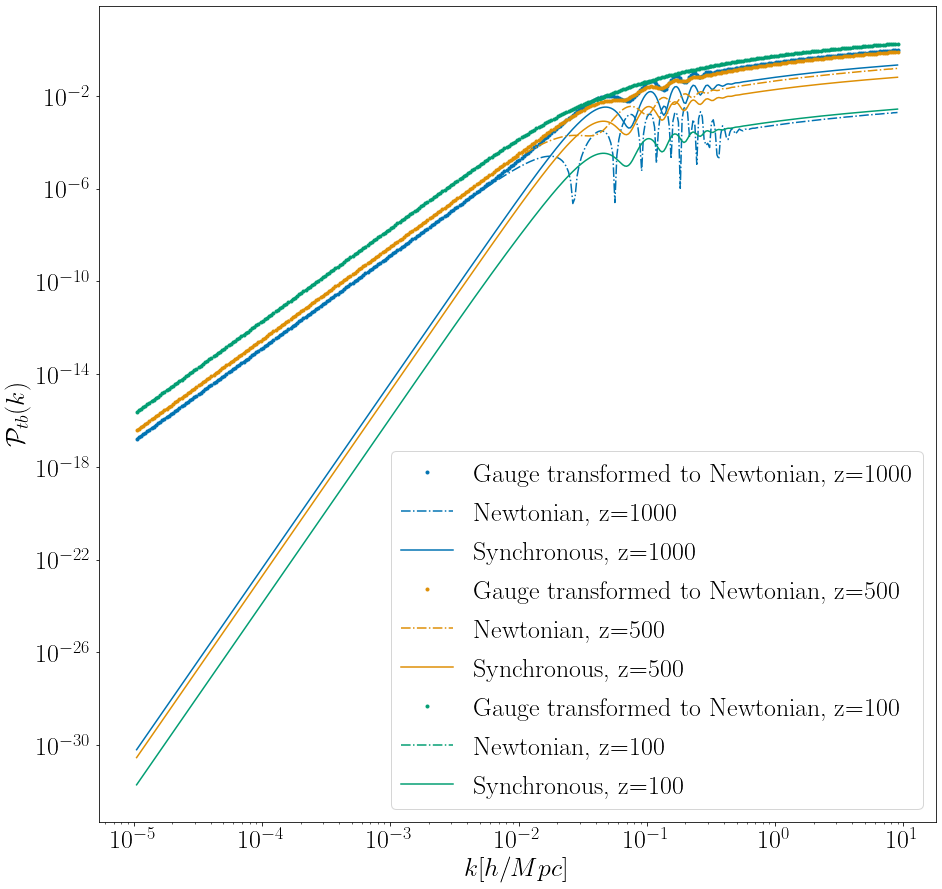

In [52]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,16]-alpha*k*k)**2,".",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,13])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,16])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{tb}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-3)
# # plt.ylim(1.e-2,3.e-2)

### t_tot